## Load the data to hdfs

In [134]:
!/hadoop/bin/hdfs dfs -mkdir /data
!/hadoop/bin/hdfs dfs -put /GlobalLandTemperaturesByCity.csv /data/


SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/apache-tez-0.10.2-bin/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
mkdir: `/data': File exists
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/apache-tez-0.10.2-bin/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
put: `/data/GlobalLandTemperatur

In [117]:
!/hadoop/bin/hdfs dfs -ls /data

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/hadoop-3.3.1/share/hadoop/common/lib/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/apache-tez-0.10.2-bin/lib/slf4j-reload4j-1.7.36.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Found 1 items
-rw-r--r--   1 root supergroup  532830464 2024-02-25 19:36 /data/GlobalLandTemperaturesByCity.csv


## Step 1: Initializing the PySpark Session

In [ ]:
import findspark

findspark.init()

from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("PySpark Session").enableHiveSupport().getOrCreate()

## Step 2: Loading the Environmental Data

In [125]:
# Load environmental data into PySpark DataFrame
env_data_df = spark.read.csv("hdfs://0.0.0.0:9000/data/GlobalLandTemperaturesByCity.csv", header=True, inferSchema=True)

## Step 3: Data Cleaning and Preprocessing

In [126]:
# Data cleaning and preprocessing
from pyspark.sql.functions import date_format
cleaned_env_data_df = env_data_df.dropna()  # Drop rows with missing values
cleaned_env_data_df_year = cleaned_env_data_df.withColumn("year", date_format("dt", "yyyy").cast('int'))

In [127]:
cleaned_env_data_df_year.show()

+----------+-------------------+-----------------------------+-----+-------+--------+---------+----+
|        dt| AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|year|
+----------+-------------------+-----------------------------+-----+-------+--------+---------+----+
|1743-11-01|              6.068|           1.7369999999999999|Århus|Denmark|  57.05N|   10.33E|1743|
|1744-04-01| 5.7879999999999985|           3.6239999999999997|Århus|Denmark|  57.05N|   10.33E|1744|
|1744-05-01|             10.644|           1.2830000000000001|Århus|Denmark|  57.05N|   10.33E|1744|
|1744-06-01| 14.050999999999998|                        1.347|Århus|Denmark|  57.05N|   10.33E|1744|
|1744-07-01|             16.082|                        1.396|Århus|Denmark|  57.05N|   10.33E|1744|
|1744-09-01| 12.780999999999999|                        1.454|Århus|Denmark|  57.05N|   10.33E|1744|
|1744-10-01|               7.95|                         1.63|Århus|Denmark|  57.05N|   10.

# Step 4: Analyzing Environmental Trends

In [135]:
avg_temp_trends_df_year = cleaned_env_data_df_year.groupby("year").agg({"AverageTemperature": "avg"}).orderBy("year")
avg_temp_trends = avg_temp_trends_df_year.toPandas();
avg_temp_trends_df_year.show()

+----+-----------------------+
|year|avg(AverageTemperature)|
+----+-----------------------+
|1743|      4.882423512747874|
|1744|     10.734046919263458|
|1745|      1.497592776203966|
|1750|       9.87280824493085|
|1751|     10.046738737075332|
|1752|      4.253063583815031|
|1753|      9.452665778961384|
|1754|      9.364699884659746|
|1755|      8.825222310666364|
|1756|       9.73270836212855|
|1757|      9.519407968574642|
|1758|      8.648493577981657|
|1759|      9.691045464270431|
|1760|      8.798937674834956|
|1761|      9.794437908496729|
|1762|      9.372744063926946|
|1763|      8.744660119457844|
|1764|      9.814161742555903|
|1765|      9.386765923925282|
|1766|       9.54100455555556|
+----+-----------------------+
only showing top 20 rows



In [129]:
avg_temp_trends = avg_temp_trends_df_year.toPandas();

In [130]:
avg_temp_trends

,year,avg(AverageTemperature)
0,1743,4.882424
1,1744,10.734047
2,1745,1.497593
3,1750,9.872808
4,1751,10.046739
...,...,...
262,2009,18.601106
263,2010,18.553508
264,2011,18.393315
265,2012,18.525969


# Step 5: Visualizing the Results

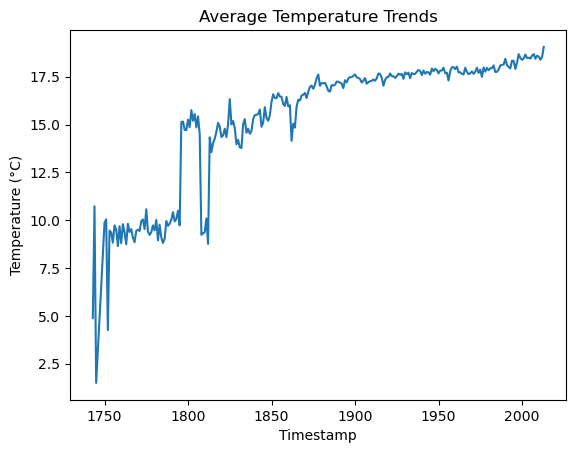

In [131]:
import matplotlib.pyplot as plt

# Visualize average temperature trends
plt.plot(avg_temp_trends["year"], avg_temp_trends["avg(AverageTemperature)"])
plt.title("Average Temperature Trends")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.show()


In [132]:
# Using plotly
import plotly.express as px

fig = px.scatter(avg_temp_trends, x="year", y="avg(AverageTemperature)", trendline="ols")

fig.write_html('scatter_plot.html', auto_open=True)

In [133]:
import plotly.express as px
fig = px.line(avg_temp_trends, x="year", y="avg(AverageTemperature)")
fig.write_html('liner_plot.html', auto_open=True)

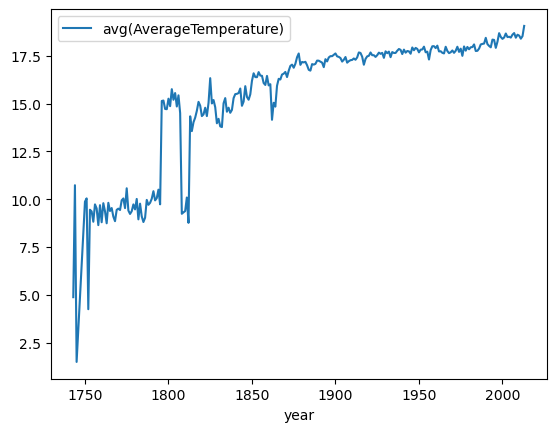

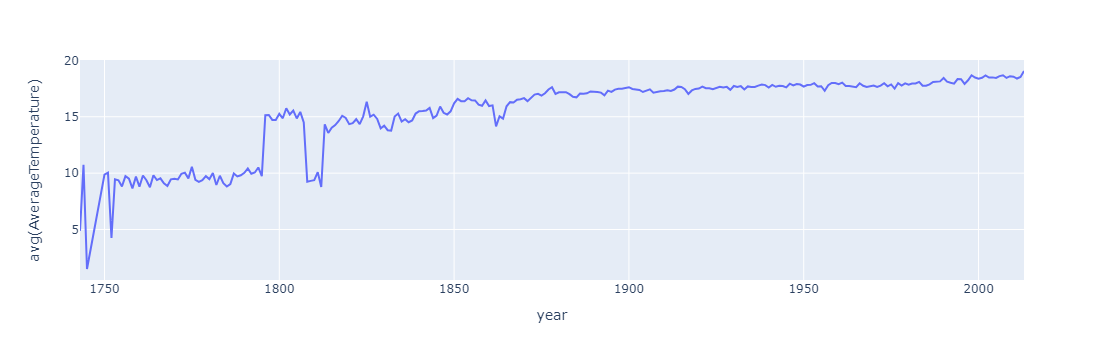

In [108]:
fig.show()

In [124]:
spark.sql("describe formatted t1").show(100, False)

+----------------------------+------------------------------------------------------------------------------------------------------------------+-------+
|col_name                    |data_type                                                                                                         |comment|
+----------------------------+------------------------------------------------------------------------------------------------------------------+-------+
|id                          |int                                                                                                               |NULL   |
|name                        |string                                                                                                            |NULL   |
|                            |                                                                                                                  |       |
|# Detailed Table Information|                                              